# Overview

# Dataset analysis

### Imports and file read in (data imputing) 

In [135]:
#imports
from IPython.display import display, Math, Latex
!pip install statsmodels
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

In [136]:
df = pd.read_csv("stage3.csv")

### Initial Exploration

In [137]:
df.info(verbose=True)
#checking columns, nulls and for anything else that pops out and needs fixing before doing operations on the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null object
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude                    

In [138]:
df.shape

(239677, 29)

In [139]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


# Question Solving

### Question 1

1. Which congressional district has the most shootings?


In [140]:
df_sorted_most_shoot = df.groupby('congressional_district').count().sort_values(['incident_id'], ascending=False).head()
#returns the count of incidents(shootings) grouped by congressional district and sorts them

In [141]:
df_sorted_most_shoot = df_sorted_most_shoot.reset_index()

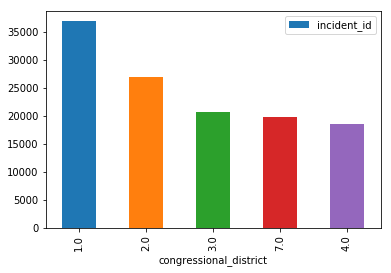

In [142]:
df_sorted_most_shoot.plot(kind='bar', x='congressional_district', y='incident_id')
plt.show()
#visualizes the groupings top 5 districts

### Question 2

2. Can we predict how many killed / injured based on the location?

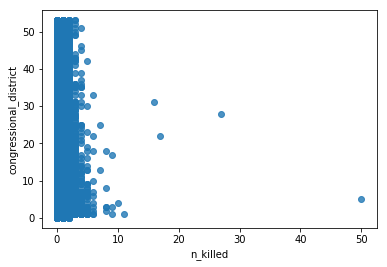

In [143]:
ax = sns.regplot(df['n_killed'], df['congressional_district'], fit_reg=False)
#wanted to see if anything popped out, only noticable info is that large shootings are rare.

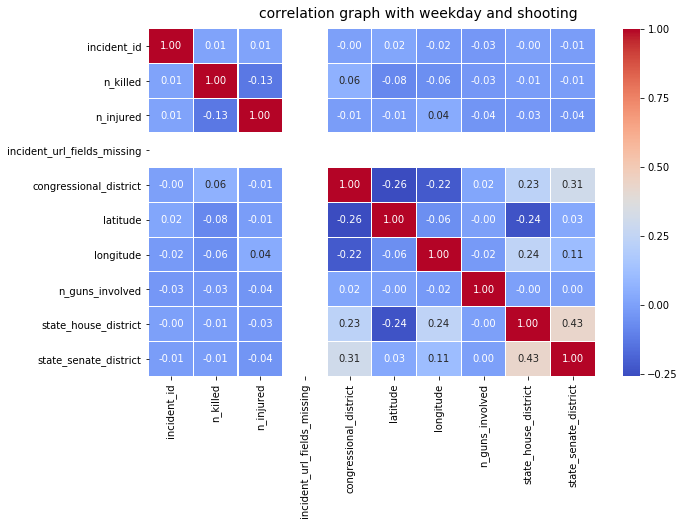

In [144]:
#checking for correlation between location and killed, found a low correlation but compared to other correlations relatively high
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('correlation graph with weekday and shooting', fontsize=14)

In [145]:
df2 = df
#backup df for use later

In [146]:
df.dropna(subset=['congressional_district'], inplace=True)
#removing nulls in case it has some

In [147]:
df.dropna(subset=['n_killed'])

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0:

In [148]:
df.shape
#checking that all values are still present

(227733, 29)

In [149]:
states = df['state'].str.get_dummies()
df = pd.concat([df, states], axis=1)
#creating features for use in dataset

In [150]:
df['congressional_district'].unique()
#confirming operation worked successfully

array([14., 43.,  9.,  6.,  1.,  2.,  7.,  3.,  8.,  5.,  4., 46., 25.,
       16., 49., 22., 10., 20., 47., 13., 18., 12., 23., 33., 17., 24.,
       30., 11., 44., 26., 21., 41., 36., 32., 15., 19., 27., 28., 34.,
       31., 48., 35., 51., 29., 38., 39., 52., 42., 40., 53., 37., 50.,
       45.,  0.])

In [151]:
x = pd.DataFrame(np.c_[df['congressional_district'],df['Alabama'], df['Alaska'], df['Arizona'], df['Arkansas'],
df['California'], df['Colorado'], df['Connecticut'], df['Delaware'], df['District of Columbia'], df['Florida'],
df['Georgia'], df['Hawaii'], df['Idaho'], df['Illinois'], df['Indiana'], df['Iowa'], df['Kansas'], df['Kentucky'],
df['Louisiana'], df['Maine'], df['Maryland'], df['Massachusetts'], df['Michigan'], df['Minnesota'], df['Mississippi'],
df['Missouri'], df['Montana'], df['Nebraska'], df['Nevada'], df['New Hampshire'],
df['New Jersey'], df['New Mexico'], df['New York'], df['North Carolina'], df['North Dakota'],
df['Ohio'], df['Oklahoma'], df['Oregon'], df['Pennsylvania'], df['Rhode Island'], df['South Carolina'], df['South Dakota'],
df['Tennessee'], df['Texas'], df['Utah'], df['Vermont'],  df['Virginia'], df['Washington'], df['West Virginia'],  df['Wisconsin'], df['Wyoming'] 
], columns = ['congressional_district','Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'])
y = df['n_killed']
#adding features for LogisticRegression model

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3) 

In [153]:
from sklearn.preprocessing import StandardScaler
stsc = StandardScaler()
stsc.fit_transform(X_train)
stsc.fit_transform(X_test)

array([[-0.470025  , -0.15416224, -0.07227224, ..., -0.08004933,
        -0.14106517, -0.0472206 ],
       [ 2.58383003, -0.15416224, -0.07227224, ..., -0.08004933,
        -0.14106517, -0.0472206 ],
       [-0.82239289, -0.15416224, -0.07227224, ..., -0.08004933,
        -0.14106517, -0.0472206 ],
       ...,
       [-0.58748096, -0.15416224, -0.07227224, ..., -0.08004933,
        -0.14106517, -0.0472206 ],
       [-0.11765711,  6.48667273, -0.07227224, ..., -0.08004933,
        -0.14106517, -0.0472206 ],
       [-0.35256903, -0.15416224, -0.07227224, ..., -0.08004933,
        -0.14106517, -0.0472206 ]])

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
clf = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)

In [156]:
clf.predict_proba(X_test)

array([[7.15639353e-01, 2.57216091e-01, 2.23504693e-02, ...,
        2.68285598e-09, 4.80002264e-05, 2.96416090e-07],
       [6.77345668e-01, 2.80255898e-01, 3.65696734e-02, ...,
        3.43372953e-50, 7.93114751e-09, 1.86929395e-31],
       [7.61659521e-01, 2.11542271e-01, 2.01990562e-02, ...,
        1.62692115e-04, 1.52485475e-04, 2.21282637e-04],
       ...,
       [7.87133264e-01, 1.94624365e-01, 1.59955305e-02, ...,
        1.26165150e-07, 7.72186909e-05, 3.37976977e-06],
       [6.92382662e-01, 2.76863223e-01, 2.66590958e-02, ...,
        5.99562726e-14, 1.94852909e-05, 5.79720456e-10],
       [7.13555246e-01, 2.52213677e-01, 2.89062968e-02, ...,
        8.82092362e-11, 4.28088376e-05, 4.53529176e-08]])

In [157]:
clf.score(X_test, y_test)

0.7794789227166277

### Amount injured

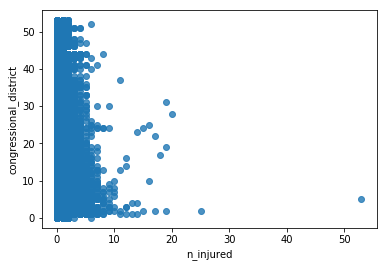

In [158]:
ax = sns.regplot(df['n_injured'], df['congressional_district'], fit_reg=False)

In [159]:
df.dropna(subset=['congressional_district'], inplace=True)

In [160]:
df.dropna(subset=['n_injured'], inplace=True)

In [161]:
df['congressional_district'].unique()

array([14., 43.,  9.,  6.,  1.,  2.,  7.,  3.,  8.,  5.,  4., 46., 25.,
       16., 49., 22., 10., 20., 47., 13., 18., 12., 23., 33., 17., 24.,
       30., 11., 44., 26., 21., 41., 36., 32., 15., 19., 27., 28., 34.,
       31., 48., 35., 51., 29., 38., 39., 52., 42., 40., 53., 37., 50.,
       45.,  0.])

In [162]:
x = pd.DataFrame(np.c_[df['congressional_district'],df['Alabama'], df['Alaska'], df['Arizona'], df['Arkansas'],
df['California'], df['Colorado'], df['Connecticut'], df['Delaware'], df['District of Columbia'], df['Florida'],
df['Georgia'], df['Hawaii'], df['Idaho'], df['Illinois'], df['Indiana'], df['Iowa'], df['Kansas'], df['Kentucky'],
df['Louisiana'], df['Maine'], df['Maryland'], df['Massachusetts'], df['Michigan'], df['Minnesota'], df['Mississippi'],
df['Missouri'], df['Montana'], df['Nebraska'], df['Nevada'], df['New Hampshire'],
df['New Jersey'], df['New Mexico'], df['New York'], df['North Carolina'], df['North Dakota'],
df['Ohio'], df['Oklahoma'], df['Oregon'], df['Pennsylvania'], df['Rhode Island'], df['South Carolina'], df['South Dakota'],
df['Tennessee'], df['Texas'], df['Utah'], df['Vermont'],  df['Virginia'], df['Washington'], df['West Virginia'],  df['Wisconsin'], df['Wyoming'] 
], columns = ['congressional_district','Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'])
y = df['n_injured']

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3) 

In [164]:
from sklearn.preprocessing import StandardScaler
stsc = StandardScaler()
stsc.fit_transform(X_train)
stsc.fit_transform(X_test)

array([[ 0.1230381 , -0.15336427, -0.07338935, ..., -0.07949184,
        -0.14208711, -0.05038482],
       [ 0.35997263, -0.15336427, -0.07338935, ..., -0.07949184,
        -0.14208711, -0.05038482],
       [-0.35083096, -0.15336427, -0.07338935, ..., -0.07949184,
        -0.14208711, -0.05038482],
       ...,
       [-0.35083096, -0.15336427, -0.07338935, ..., -0.07949184,
        -0.14208711, -0.05038482],
       [-0.82470002, -0.15336427, -0.07338935, ..., -0.07949184,
        -0.14208711, -0.05038482],
       [-0.82470002, -0.15336427, -0.07338935, ..., -0.07949184,
        -0.14208711, -0.05038482]])

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
clf = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)

In [167]:
clf.predict_proba(X_test)

array([[5.14599152e-01, 4.13546265e-01, 5.32223269e-02, ...,
        2.04007420e-05, 1.22234397e-15, 8.17879745e-12],
       [5.39556398e-01, 3.87240058e-01, 5.71034407e-02, ...,
        1.24471205e-05, 1.72975991e-18, 9.70158936e-14],
       [5.62764854e-01, 3.69020064e-01, 5.09249199e-02, ...,
        4.41061411e-05, 4.82715875e-10, 4.16511941e-08],
       ...,
       [5.03964610e-01, 4.23016874e-01, 5.43139149e-02, ...,
        5.12508652e-05, 5.01696127e-10, 4.53188918e-08],
       [3.45520810e-01, 5.43244451e-01, 8.26949845e-02, ...,
        1.02273226e-04, 1.58245181e-04, 1.84207926e-04],
       [6.01143109e-01, 3.27235442e-01, 5.37455044e-02, ...,
        1.24868989e-04, 2.02261200e-04, 5.77868921e-04]])

In [168]:
clf.score(X_test, y_test)

0.604961943793911

#### For fun

In [169]:
df['n_guns_involved'].shape

(227733,)

In [170]:
df.dropna(subset=['n_guns_involved'], inplace=True)

In [171]:
df['n_guns_involved'].shape

(128301,)

In [172]:
x = pd.DataFrame(np.c_[df['n_guns_involved'], df['n_injured'], df['congressional_district'], df['Alabama'], df['Alaska'], df['Arizona'], df['Arkansas'],
df['California'], df['Colorado'], df['Connecticut'], df['Delaware'], df['District of Columbia'], df['Florida'],
df['Georgia'], df['Hawaii'], df['Idaho'], df['Illinois'], df['Indiana'], df['Iowa'], df['Kansas'], df['Kentucky'],
df['Louisiana'], df['Maine'], df['Maryland'], df['Massachusetts'], df['Michigan'], df['Minnesota'], df['Mississippi'],
df['Missouri'], df['Montana'], df['Nebraska'], df['Nevada'], df['New Hampshire'],
df['New Jersey'], df['New Mexico'], df['New York'], df['North Carolina'], df['North Dakota'],
df['Ohio'], df['Oklahoma'], df['Oregon'], df['Pennsylvania'], df['Rhode Island'], df['South Carolina'], df['South Dakota'],
df['Tennessee'], df['Texas'], df['Utah'], df['Vermont'],  df['Virginia'], df['Washington'], df['West Virginia'],  df['Wisconsin'], df['Wyoming'] 
], columns = ['n_guns_involved','n_injured','congressional_district','Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'])
y = df['n_killed']
# adding more features to see if they can increase accuracy

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3) 

In [174]:
from sklearn.preprocessing import StandardScaler
stsc = StandardScaler()
stsc.fit_transform(X_train)
stsc.fit_transform(X_test)

array([[-0.07813207, -0.64721946, -0.48171872, ..., -0.08085472,
         6.83780543, -0.04175766],
       [-0.07813207, -0.64721946, -0.84031995, ..., -0.08085472,
        -0.14624575, -0.04175766],
       [-0.07813207,  0.79645951, -0.72078621, ..., -0.08085472,
        -0.14624575, -0.04175766],
       ...,
       [-0.07813207,  0.79645951, -0.60125247, ..., -0.08085472,
        -0.14624575, -0.04175766],
       [-0.07813207,  0.79645951,  1.07221995, ..., -0.08085472,
        -0.14624575, -0.04175766],
       [-0.07813207,  0.79645951,  1.78942241, ..., -0.08085472,
        -0.14624575, -0.04175766]])

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
clf = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)

In [177]:
clf.predict_proba(X_test)

array([[7.99421815e-01, 1.80895748e-01, 1.59625995e-02, ...,
        7.11247403e-05, 8.40563702e-05, 9.17130339e-08],
       [7.93376451e-01, 1.75713196e-01, 2.11136977e-02, ...,
        1.22234524e-04, 1.35889005e-04, 1.38172259e-04],
       [9.45626685e-01, 4.04749382e-02, 9.27543478e-03, ...,
        1.30563447e-04, 1.48303191e-04, 2.03166556e-05],
       ...,
       [8.47619682e-01, 1.21126750e-01, 2.71436096e-02, ...,
        1.05315498e-04, 1.21220453e-04, 1.58536887e-06],
       [8.71665666e-01, 1.13648530e-01, 1.23004400e-02, ...,
        1.04570438e-05, 1.67875230e-05, 1.16294485e-21],
       [8.26181463e-01, 1.45935406e-01, 2.34740481e-02, ...,
        5.50794848e-06, 1.05681817e-05, 4.92070383e-28]])

In [178]:
clf.score(X_test, y_test)

0.7865215245122237

### Question 3

3. Is there a relationship between week day and shooting?

In [179]:
#Data is mostly usable just need to create a weekday column in the database from the already available date column
df_date = pd.to_datetime(df2['date'])
df2['day_of_week'] = df_date.dt.day_name()
df2.head()
#adding weekdays to df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,day_of_week
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,Tuesday
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,Tuesday
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,Tuesday
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,Saturday
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,Monday


In [181]:
df2 = df2.replace("Monday", 1)
df2 = df2.replace("Tuesday", 2)
df2 = df2.replace("Wednesday", 3)
df2 = df2.replace("Thursday", 4)
df2 = df2.replace("Friday", 5)
df2 = df2.replace("Saturday", 6)
df2 = df2.replace("Sunday", 7)
#replacing with numeric values

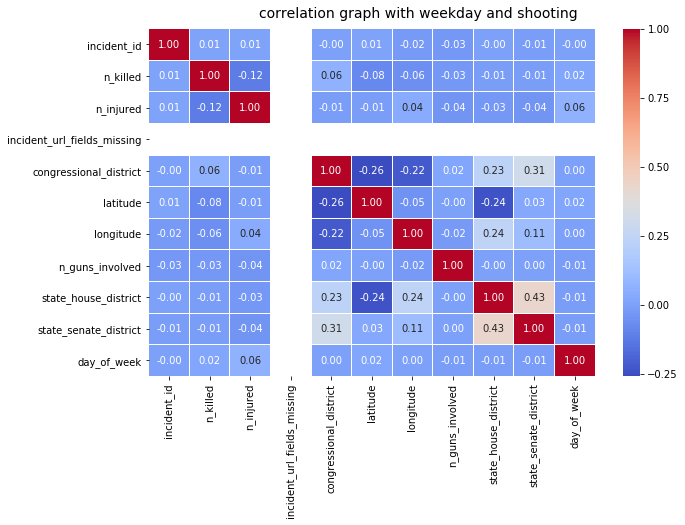

In [182]:
f, ax = plt.subplots(figsize=(10, 6))
corr2 = df2.corr()
hm = sns.heatmap(round(corr2,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('correlation graph with weekday and shooting', fontsize=14)

There is low correlation with all values other then number of injured and the day of the week

### Question 4

4. 

In [183]:
df_date = pd.to_datetime(df2['date'])
df2['month'] = df_date.dt.month
df2['year'] = df_date.dt.year
df2['count'] = 1
#adding feautures

In [184]:

yr_13 = df2[df2['year'].isin([2013])]
yr_14 = df2[df2['year'].isin([2014])]
yr_15= df2[df2['year'].isin([2015])]
yr_16= df2[df2['year'].isin([2016])]
yr_17= df2[df2['year'].isin([2017])]
yr_18= df2[df2['year'].isin([2018])]
#finding values in certain years 

In [185]:
count_13 = yr_13.groupby('month').agg(['count'])['incident_id']
count_14 = yr_14.groupby('month').agg(['count'])['incident_id']
count_15 = yr_15.groupby('month').agg(['count'])['incident_id']
count_16 = yr_16.groupby('month').agg(['count'])['incident_id']
count_17 = yr_17.groupby('month').agg(['count'])['incident_id']
count_18 = yr_18.groupby('month').agg(['count'])['incident_id']
# grouping by selected year

In [186]:
count_13['year'] = 2013
count_14['year'] = 2014
count_15['year'] = 2015
count_16['year'] = 2016
count_17['year'] = 2017
count_18['year'] = 2018
#adding year column

In [187]:
count_13 = count_13.reset_index()
count_14 = count_14.reset_index()
count_15 = count_15.reset_index()
count_16 = count_16.reset_index()
count_17 = count_17.reset_index()
count_18 = count_18.reset_index()
#removing grouping index

In [188]:
df_combo = pd.concat([count_13, count_14, count_15, count_16, count_17, count_18])
#merging the data

In [189]:
df_combo.shape
#checking the shape

(63, 3)

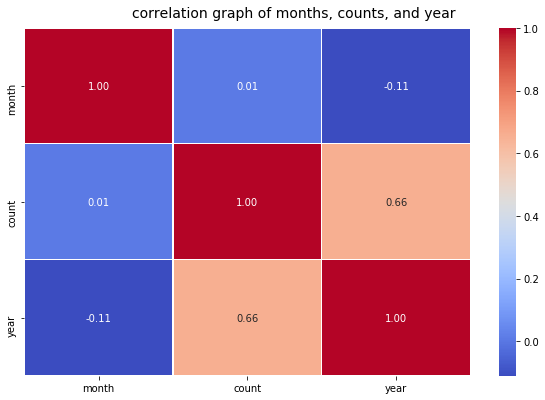

In [190]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df_combo.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('correlation graph of months, counts, and year', fontsize=14)

# Visualizations, Explanations, and Conclusions

## Question and answer summary with visuals

### Question 1

Which congressional district has the most shootings?


#### Answer

Congressional district 1 has the most shootings with 36910 incidents occuring

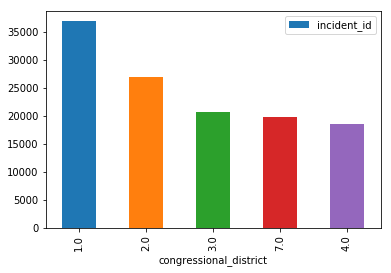

In [191]:
df_sorted_most_shoot.plot(kind='bar', x='congressional_district', y='incident_id')
plt.show()

### Question 2

Can we predict how many killed / injured based on the location?


#### Answer

By giving location (state and congressional district) we can predict the amount of people that were killed with 78% accuracy.
_______________________________________________________________________________________________________________________________
By giving location (state and congressional district) we can predict the amount of people that were injured with 60% accuracy.
_______________________________________________________________________________________________________________________________
This shows us that the amount of people killed is more easily predicted by the location.
_______________________________________________________________________________________________________________________________
0.7804303278688525 By adding these variables we improved the model by .785%. If we had less null values we could have likely increased this algorithm by a more significant amount.

### Question 3

Is there a relationship between week day and shooting?

#### Answer

There is low correlation with all values other then number of injured and the day of the week

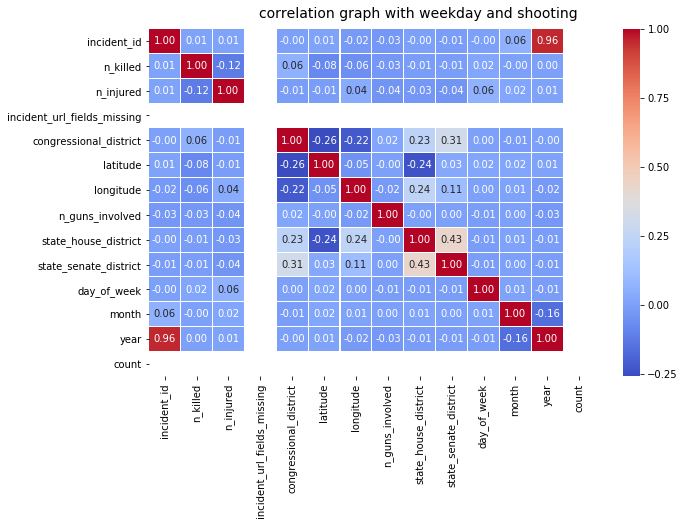

In [192]:
f, ax = plt.subplots(figsize=(10, 6))
corr2 = df2.corr()
hm = sns.heatmap(round(corr2,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('correlation graph with weekday and shooting', fontsize=14)

### Question 4

Does the month correlate with the number of shootings that occur?

#### Answer

Count and month have a low correlation but count of incidents and year has a high correlation

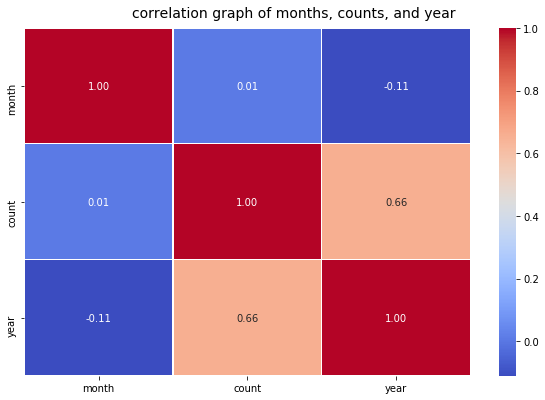

In [193]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df_combo.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('correlation graph of months, counts, and year', fontsize=14)